# Predicting the buyers of SUV car using KNN ML Algorithm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Importing the dataset

df=pd.read_csv('C:\\Users\\aruns\\Downloads\\User_Data.csv') 
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.shape

(400, 5)

In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
df.isnull().sum() # checking the null values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
df.duplicated().sum()

0

 # Checking the relationship between variables

In [15]:
correlation=df.corr()
correlation

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

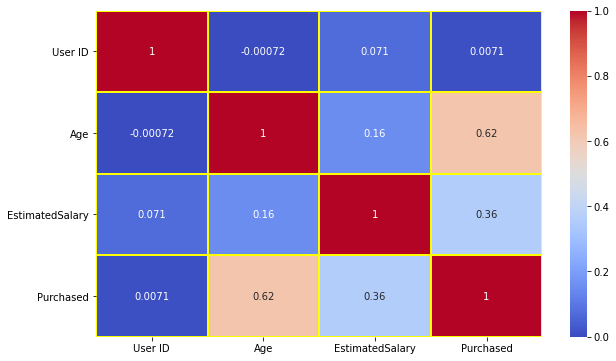

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,linewidth=1,linecolor='yellow',cmap='coolwarm')

# Visualizing our data

In [19]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

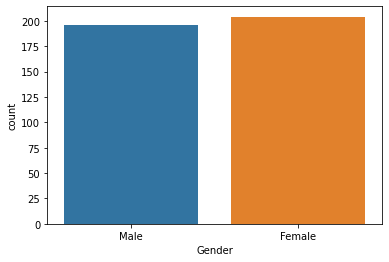

In [21]:
sns.countplot(x="Gender",data=df)

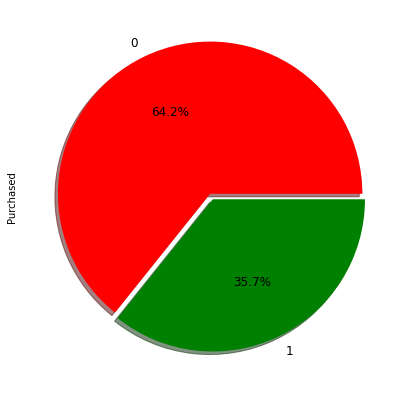

In [23]:
df.Purchased.value_counts().plot(kind='pie',figsize=(7,7),autopct="%1.1f%%",fontsize=12,shadow=True,explode=[0.02,0.02],
                                colors=['red','green'])
plt.show()

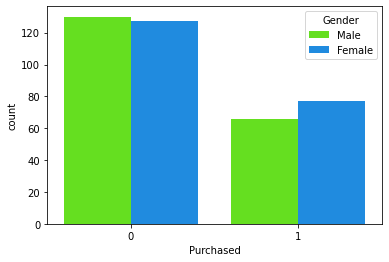

In [24]:
sns.countplot(x='Purchased',hue='Gender',data=df,palette='gist_rainbow')
plt.show()

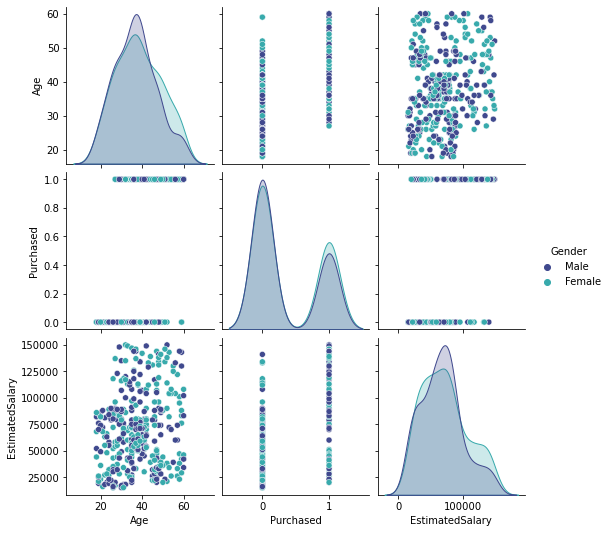

In [26]:
sns.pairplot(df,vars=['Age','Purchased','EstimatedSalary'],hue='Gender',palette='mako')
plt.show()

# Data preprocessing

In [32]:
df1=pd.get_dummies(df,drop_first=True)
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


# Data Preparing

In [37]:
# Extracting independent and dependent variables
X=df1.iloc[:,[1,2,4]].values # Independent variables[Age,Estimated Salary,Gender_male]
y=df1.iloc[:,3].values # dependent variable[Purchased]

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [74]:
print('Shape of X train data',X_train.shape)
print('Shape of X test data',X_test.shape)
print('Shape of y train data',y_train.shape)
print('Shape of y test data',X_test.shape)

Shape of X train data (300, 3)
Shape of X test data (100, 3)
Shape of y train data (300,)
Shape of y test data (100, 3)


# Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

# KNN Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

# Predicting the test result

In [80]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [81]:
data=pd.DataFrame({'Actual':y_test,'Predictted':y_pred})
data

,Actual,Predictted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
95,1,1
96,0,0
97,0,0
98,0,0


   # Predicting whether user can purchase the car or not

In [82]:
new=np.array([[30,118000,1]])
pred=knn.predict(st.transform(new))
pred

array([1], dtype=int64)

In [83]:
new=np.array([[20,11000,0]])
pred=knn.predict(st.transform(new))
pred

array([0], dtype=int64)

# Accuracy test and score using confusion_matrix and accuracy_score

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print('The Confusion Matrix is :','\n',cm)
print('The Accuracy score is :',accuracy_score(y_test,y_pred))

The Confusion Matrix is : 
 [[66  3]
 [ 1 30]]
The Accuracy score is : 0.96


In [85]:
# Based on this there are 96 correct predictions and 4 incorrect predictions and our accuracy score also 96%.